# Chapter 1 Rで遊ぶ
## 1.2 簡単な計算

In [1]:
123 + 456

[1] 579

In [2]:
123 * 456 - 987 / (654 + 321)

[1] 56086.99

In [3]:
pi

[1] 3.141593

In [4]:
print(pi)

[1] 3.141593


In [5]:
print(pi, digits = 16)

[1] 3.141592653589793


In [6]:
x <- 12345
x

[1] 12345

In [7]:
print(pi)
pi <- 3
print(pi)
rm(pi)
print(pi)

[1] 3.141593
[1] 3
[1] 3.141593


In [8]:
exp(1)

[1] 2.718282

## 1.4 データの入力

In [9]:
height <- c(168.5, 172.8, 159.0)
weight <- c(69.5, 75.0, 56.5)

In [10]:
weight / (height / 100)^2

[1] 24.47851 25.11735 22.34880

In [11]:
library(pipeR)

Warning message:
: package ‘pipeR’ was built under R version 3.2.4

In [12]:
(weight / (height / 100)^2) %>>% round

[1] 24 25 22

In [13]:
(weight / (height / 100)^2) %>>% round(1)

[1] 24.5 25.1 22.3

## 1.5 データフレーム

In [14]:
X <- data.frame(height, weight)
X

,height,weight
1,168.5,69.5
2,172.8,75.0
3,159.0,56.5


In [15]:
X$height

[1] 168.5 172.8 159.0

In [16]:
X$sex <- c("M", "M", "F")
X

,height,weight,sex
1,168.5,69.5,M
2,172.8,75,M
3,159,56.5,F


In [17]:
X$BMI <- with(weight / (height / 100)^2, data = X) %>>% round(0)
X

,height,weight,sex,BMI
1,168.5,69.5,M,24
2,172.8,75,M,25
3,159,56.5,F,22


## 1.6 ファイルの読み書きと文字コード

In [18]:
dir(".")

[1] "Chap01.ipynb"

In [19]:
write.csv(X, "X.csv", quote = FALSE, row.names = FALSE, fileEncoding = "UTF-8", eol = "\r\n")

In [20]:
dir(".")

[1] "Chap01.ipynb" "X.csv"

In [21]:
XX <- read.csv("X.csv")
XX

,height,weight,sex,BMI
1,168.5,69.5,M,24
2,172.8,75,M,25
3,159,56.5,F,22


In [22]:
XXX <- read.csv("http://okumuralab.org/~okumura/stat/data/coal.csv")
str(XXX)

'data.frame':	191 obs. of  7 variables:
 $ Day             : Factor w/ 8 levels "Fri","Frj","Mon",..: 4 7 4 3 4 6 3 6 8 4 ...
 $ Date            : int  15 19 20 22 24 6 10 20 22 12 ...
 $ Month           : Factor w/ 12 levels "April","Aug",..: 8 2 3 3 1 9 9 9 3 8 ...
 $ Year            : int  1851 1851 1851 1851 1852 1852 1852 1852 1852 1853 ...
 $ Day_of_year     : int  74 231 354 356 115 127 131 141 357 71 ...
 $ Interval_days   : int  NA 157 123 2 124 12 4 10 216 80 ...
 $ Number_of_deaths: int  61 35 52 13 12 22 65 36 10 10 ...


## 1.7 図の描き方

In [23]:
library(ggplot2)

Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

In [24]:
options(repr.plot.height = 4, repr.plot.width = 4)

In [25]:
x <- rnorm(1000000)

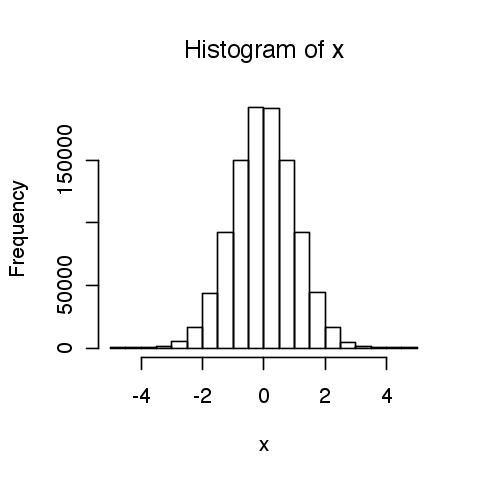

In [26]:
hist(x)

In [27]:
library("Cairo")

pdf 
  2

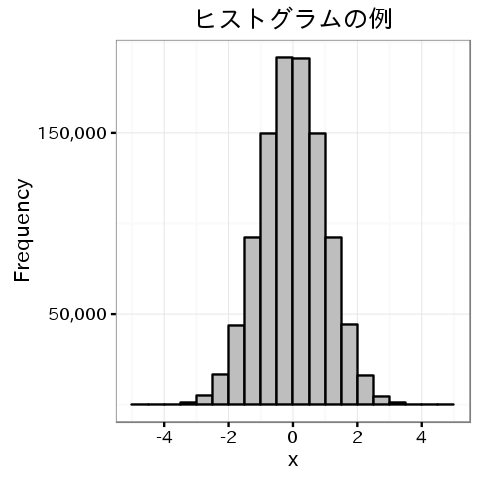

In [32]:
Cairo(type = "raster")
CairoFonts(regular = "IPAexGothic") # Mac
ggplot(data.frame(x = x), aes(x = x)) + 
    geom_histogram(binwidth = 0.5, boundary = 0.5, fill = "gray", colour = "black") + 
    theme_bw() + 
    theme(plot.title = element_text(family = "IPAexGothic")) + # Win
    scale_x_continuous(breaks = seq(-4, 4, 2)) + 
    scale_y_continuous(labels = scales::comma, breaks = c(50000, 150000)) + 
    ylab("Frequency") + 
    labs(title = "ヒストグラムの例")
dev.off()

## 1.8 パッケージの例: Excelファイルを読む

In [33]:
library(readxl)

Warning message:
: package ‘readxl’ was built under R version 3.2.4

In [34]:
d <- read_excel("test.xlsx")
str(d)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	5 obs. of  3 variables:
 $ Num : num  1 2 3 4 5
 $ Text: chr  "A" "B" "C" "D" ...
 $ Date: POSIXct, format: "2016-01-01" "2016-02-01" ...


In [37]:
print(d)

  Num Text       Date
1   1    A 2016-01-01
2   2    B 2016-02-01
3   3    C 2016-03-01
4   4    D 2016-04-01
5   5    E 2016-05-01


In [38]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, darwin13.4.0        
 ui       X11                         
 language (EN)                        
 collate  ja_JP.UTF-8                 
 tz       Asia/Tokyo                  
 date     2016-09-23                  

 package    * version date       source        
 base64enc    0.1-3   2015-07-28 CRAN (R 3.2.0)
 Cairo      * 1.5-9   2015-09-26 CRAN (R 3.2.0)
 colorspace   1.2-6   2015-03-11 CRAN (R 3.2.0)
 devtools     1.11.1  2016-04-21 CRAN (R 3.2.5)
 digest       0.6.9   2016-01-08 CRAN (R 3.2.2)
 evaluate     0.9     2016-04-29 CRAN (R 3.2.5)
 ggplot2    * 2.1.0   2016-03-01 CRAN (R 3.2.4)
 gtable       0.2.0   2016-02-26 CRAN (R 3.2.3)
 IRdisplay    0.3     2016-05-14 local         
 IRkernel     0.5     2016-05-14 local         
 jsonlite     0.9.20  2016-05-10 CRAN (R 3.2.5)
 labeling     0.3     2014-08-23 CRAN (R 3.2.0)
 magrittr     1.5     2014-11-22 CRAN (R 3.2.0)
 memoise      1